In [3]:
import pandas as pd 
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

# Time Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

# For printing multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Visualization parameters
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [4]:
manali_daily_aqi = pd.read_csv("../data/AQIData/manali_daily_aqi.csv")

In [5]:
# Assuming manali_daily_aqi is your original DataFrame
# First, set the index to the 'Timestamp' column
manali_daily_aqi_indexed = manali_daily_aqi.set_index('Timestamp')

# Make sure the index is datetime
manali_daily_aqi_indexed.index = pd.to_datetime(manali_daily_aqi_indexed.index)

# Now, keep only the 'AQI' column
manali_daily_aqi_filtered = manali_daily_aqi_indexed[['AQI']]

# Now you can split the data
train_data = manali_daily_aqi_filtered.loc[:'2023-11-23']
test_data = manali_daily_aqi_filtered.loc['2023-11-24':'2023-12-01']


In [6]:
train_data

,AQI
Timestamp,
2021-01-01,102.095833
2021-01-02,88.393056
2021-01-03,88.200000
2021-01-04,88.316667
2021-01-05,109.905244
...,...
2023-11-19,57.525398
2023-11-20,47.378137
2023-11-21,75.433177


In [7]:
test_data

,AQI
Timestamp,
2023-11-24,61.200852
2023-11-25,64.490064
2023-11-26,74.444097
2023-11-27,69.164910
2023-11-28,60.831174
2023-11-29,60.332306
2023-11-30,55.809747
2023-12-01,48.863943


In [8]:
# Assuming manali_daily_aqi_filtered is already defined and contains only 'AQI' with 'Timestamp' as index
train_end = pd.Timestamp('2023-11-23')
test_end = pd.Timestamp('2023-12-01')

# Ensure you are using the filtered DataFrame with only 'AQI'
train_data = manali_daily_aqi_filtered[:train_end]['AQI']
test_data = manali_daily_aqi_filtered[train_end + pd.Timedelta(days=1):test_end]['AQI']

my_order = (1, 0, 1)
rolling_predictions = test_data.copy()

# Loop through the test data index for rolling predictions
for current_test_date in test_data.index:
    print("Current test date:", current_test_date)
    
    # Create the training data up to the day before the current test day
    train_data = manali_daily_aqi_filtered[:current_test_date - pd.Timedelta(days=1)]['AQI']
    
    # Fit the ARIMA model
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    
    # Forecast the next value
    pred = model_fit.forecast(steps=1)  # Forecasting one step ahead
    print("Predicted value:", pred[0])
    
    # Store the prediction in the rolling_predictions Series
    rolling_predictions[current_test_date] = pred[0]  # Store the predicted value

# Display the rolling predictions
print("\nRolling Predictions:")
print(rolling_predictions)


Current test date: 2023-11-24 00:00:00
Predicted value: 68.18718765360984
Current test date: 2023-11-25 00:00:00


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/1538924565.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Predicted value:", pred[0])
/tmp/ipykernel_16970/1538924565.py:28: Futur

Predicted value: 70.92752450039376
Current test date: 2023-11-26 00:00:00
Predicted value: 73.1379347505682
Current test date: 2023-11-27 00:00:00


/tmp/ipykernel_16970/1538924565.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Predicted value:", pred[0])
/tmp/ipykernel_16970/1538924565.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rolling_predictions[current_test_date] = pred[0]  # Store the predicted value
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency infor

Predicted value: 77.69032148236822
Current test date: 2023-11-28 00:00:00
Predicted value: 77.30893444289151
Current test date: 2023-11-29 00:00:00


/tmp/ipykernel_16970/1538924565.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Predicted value:", pred[0])
/tmp/ipykernel_16970/1538924565.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rolling_predictions[current_test_date] = pred[0]  # Store the predicted value
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency infor

Predicted value: 74.0120991120706
Current test date: 2023-11-30 00:00:00
Predicted value: 72.63227242877494
Current test date: 2023-12-01 00:00:00
Predicted value: 70.41181035736946

Rolling Predictions:
Timestamp
2023-11-24    68.187188
2023-11-25    70.927525
2023-11-26    73.137935
2023-11-27    77.690321
2023-11-28    77.308934
2023-11-29    74.012099
2023-11-30    72.632272
2023-12-01    70.411810
Name: AQI, dtype: float64


/tmp/ipykernel_16970/1538924565.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Predicted value:", pred[0])
/tmp/ipykernel_16970/1538924565.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rolling_predictions[current_test_date] = pred[0]  # Store the predicted value


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 101')

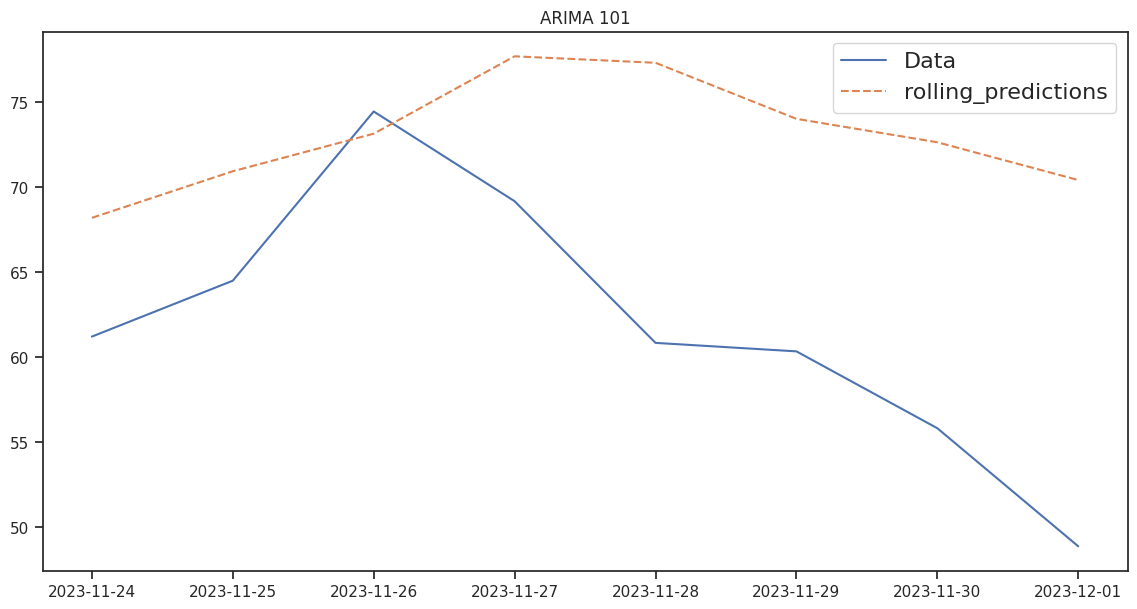

In [9]:
p, d, q = 1, 0, 1 
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 101')

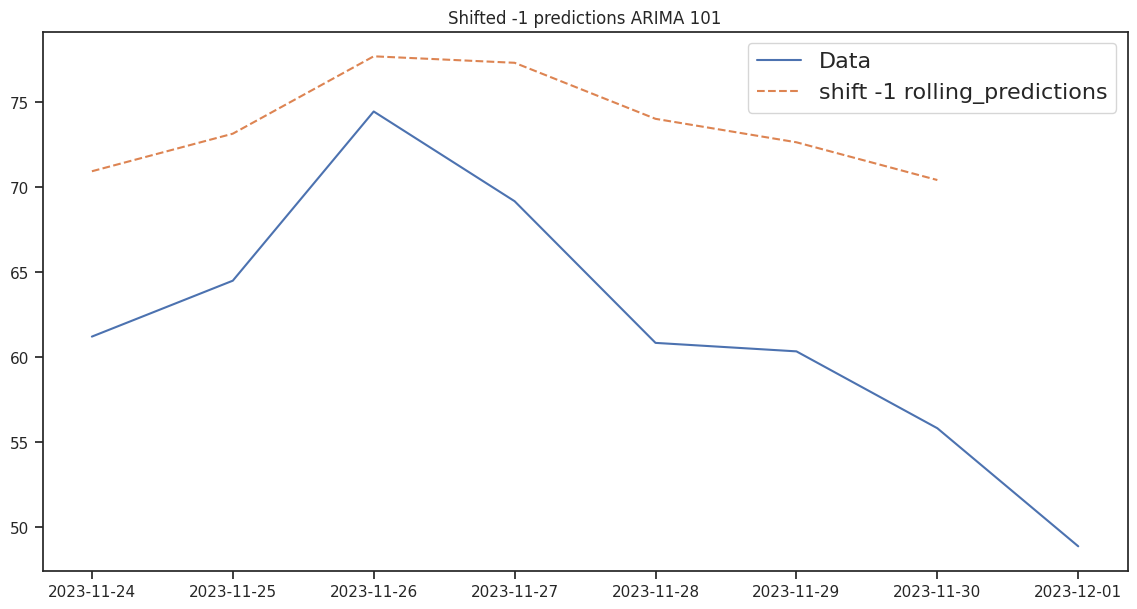

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA " + str(p) + str(d) + str(q))

In [11]:
train_data = manali_daily_aqi_filtered[:train_end]['AQI']
test_data = manali_daily_aqi_filtered[train_end + timedelta(days=1):test_end]['AQI']

my_order = (1, 0, 0)
p, d, q = my_order
rolling_predictions = test_data.copy()

for current_test_date in test_data.index:
    train_data = manali_daily_aqi_filtered[:current_test_date - timedelta(days=1)]['AQI']
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    print("pred", pred)
    rolling_predictions[current_test_date] = pred

rolling_predictions

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/161752124.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[current_test_date] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency inf

pred 2023-11-24    72.364073
Freq: D, dtype: float64
pred 2023-11-25    75.597164
Freq: D, dtype: float64
pred 2023-11-26    77.135574
Freq: D, dtype: float64


/tmp/ipykernel_16970/161752124.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[current_test_date] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/161752124.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise 

pred 2023-11-27    81.832231
Freq: D, dtype: float64
pred 2023-11-28    79.325962
Freq: D, dtype: float64
pred 2023-11-29    75.368082
Freq: D, dtype: float64
pred 2023-11-30    75.112561
Freq: D, dtype: float64
pred 2023-12-01    72.94829
Freq: D, dtype: float64


/tmp/ipykernel_16970/161752124.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[current_test_date] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/161752124.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise 

Timestamp
2023-11-24    72.364073
2023-11-25    75.597164
2023-11-26    77.135574
2023-11-27    81.832231
2023-11-28    79.325962
2023-11-29    75.368082
2023-11-30    75.112561
2023-12-01    72.948290
Name: AQI, dtype: float64

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 100')

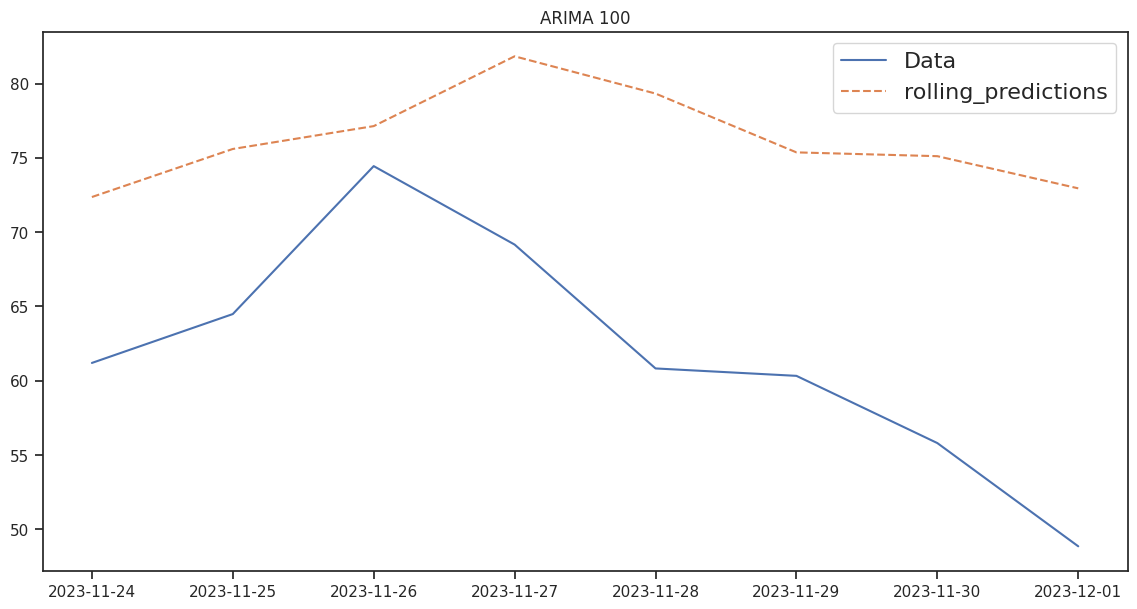

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 100')

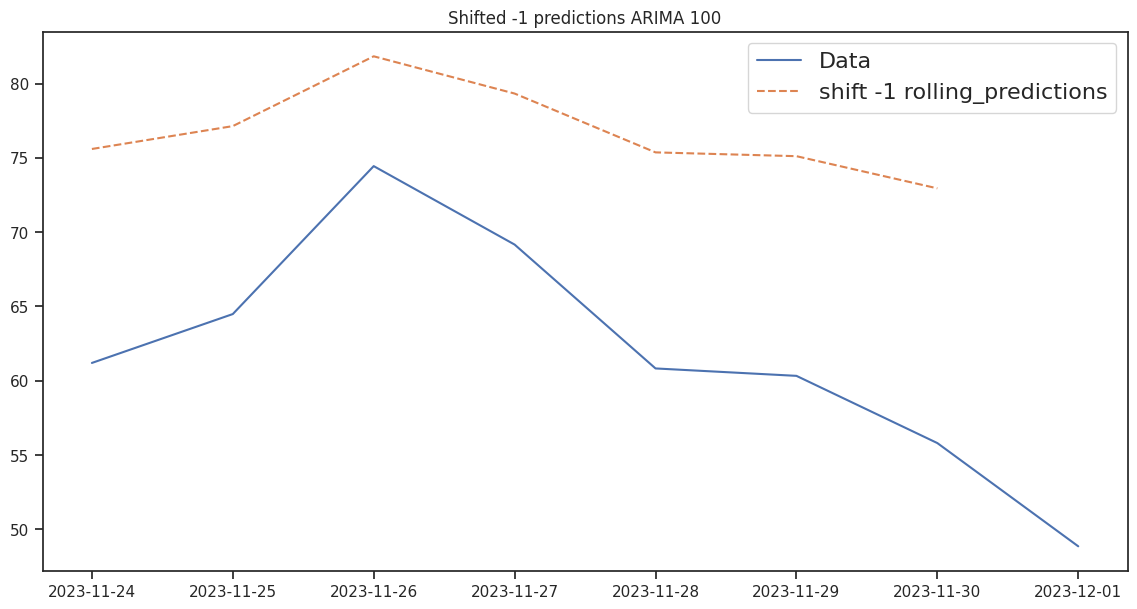

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA " + str(p) + str(d) + str(q))

In [14]:
train_end = datetime(2023, 10, 23)
test_end = datetime(2023, 11, 22)

train_data = manali_daily_aqi_filtered[:train_end]['AQI']
test_data = manali_daily_aqi_filtered[train_end + timedelta(days=1):test_end]['AQI']

my_order = (0, 0, 1)
p, d, q = my_order
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = manali_daily_aqi_filtered[:train_end - timedelta(days=1)]['AQI']
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    print("pred", pred)
    rolling_predictions[train_end] = pred

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information

pred 2023-10-24    118.555376
Freq: D, dtype: float64
pred 2023-10-25    107.924117
Freq: D, dtype: float64
pred 2023-10-26    126.870395
Freq: D, dtype: float64


/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-10-27    108.811507
Freq: D, dtype: float64
pred 2023-10-28    96.869099
Freq: D, dtype: float64


/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-10-29    83.33928
Freq: D, dtype: float64
pred 2023-10-30    83.439668
Freq: D, dtype: float64
pred 2023-10-31    108.913721
Freq: D, dtype: float64


/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-01    99.567065
Freq: D, dtype: float64
pred 2023-11-02    86.784862
Freq: D, dtype: float64


/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-03    85.613942
Freq: D, dtype: float64
pred 2023-11-04    83.786974
Freq: D, dtype: float64
pred 2023-11-05    86.570215
Freq: D, dtype: float64


/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-06    79.773408
Freq: D, dtype: float64
pred 2023-11-07    85.837427
Freq: D, dtype: float64
pred 2023-11-08    89.159073
Freq: D, dtype: float64


/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-09    84.26557
Freq: D, dtype: float64
pred 2023-11-10    80.201528
Freq: D, dtype: float64
pred 2023-11-11    95.980038
Freq: D, dtype: float64


/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-12    103.787189
Freq: D, dtype: float64
pred 2023-11-13    180.332548
Freq: D, dtype: float64
pred 2023-11-14    114.962478
Freq: D, dtype: float64


/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-15    98.98415
Freq: D, dtype: float64
pred 2023-11-16    90.016449
Freq: D, dtype: float64
pred 2023-11-17    93.912631
Freq: D, dtype: float64


/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-18    81.83983
Freq: D, dtype: float64
pred 2023-11-19    78.023921
Freq: D, dtype: float64
pred 2023-11-20    80.50416
Freq: D, dtype: float64


/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-21    75.445573
Freq: D, dtype: float64
pred 2023-11-22    88.58474
Freq: D, dtype: float64


/tmp/ipykernel_16970/907858324.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 001')

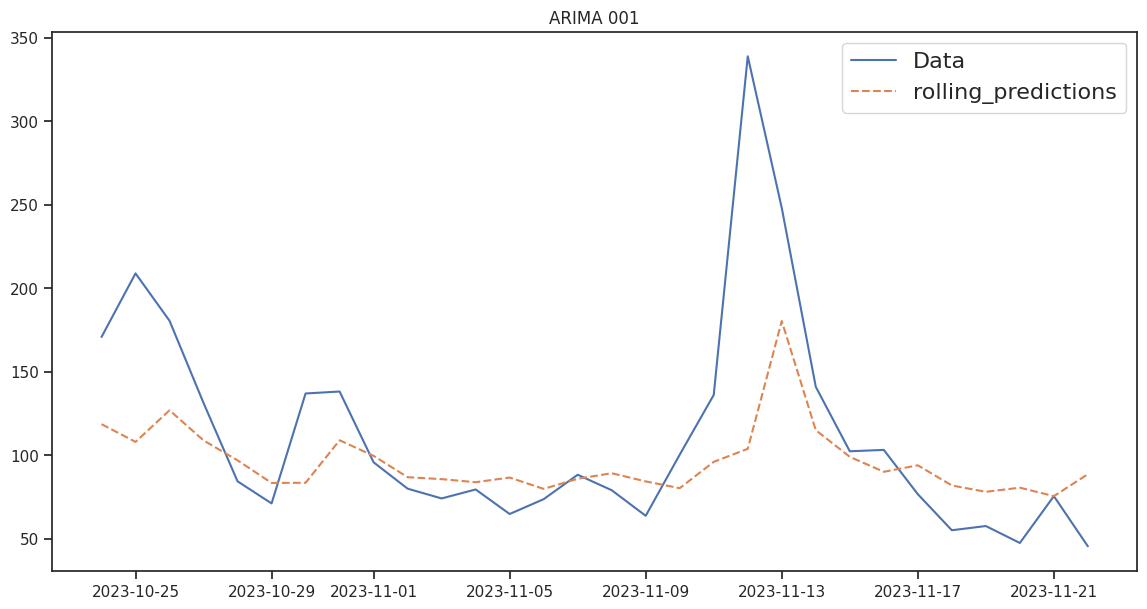

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 001')

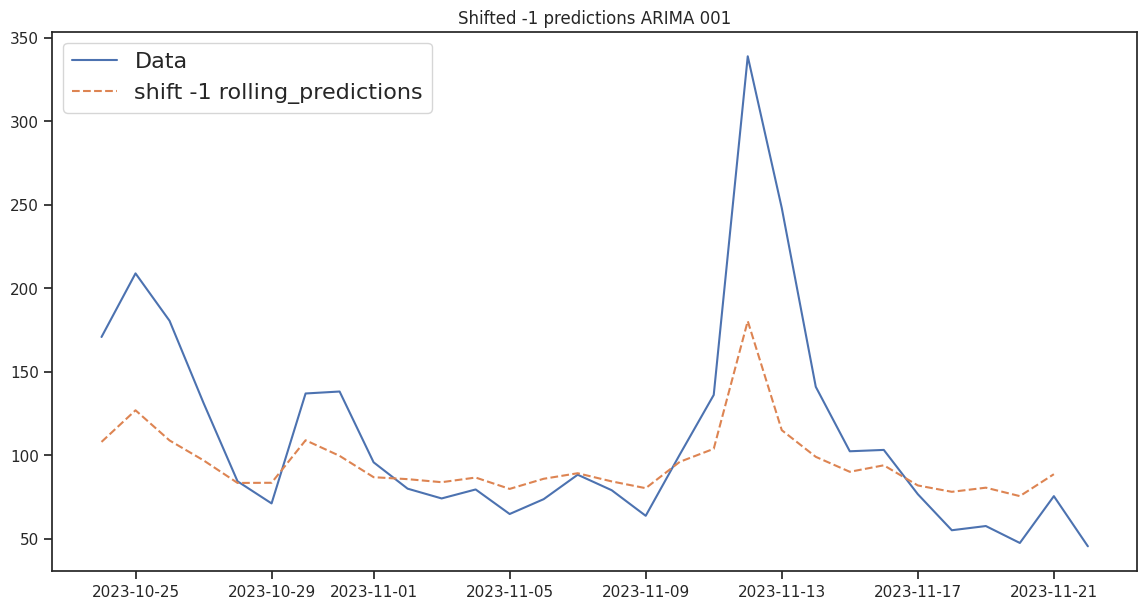

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA " + str(p) + str(d) + str(q))

In [17]:
train_end = datetime(2023, 11, 18)  # 4 days
test_end = datetime(2023, 11, 22)

train_data = manali_daily_aqi_filtered[:train_end]['AQI']
test_data = manali_daily_aqi_filtered[train_end + timedelta(days=1):test_end]['AQI']

p, d, q = (1, 0, 1)
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()
print("Model summary ", model_fit.summary())

Model summary                                 SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                 1052
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5331.472
Date:                Wed, 26 Feb 2025   AIC                          10670.944
Time:                        12:00:06   BIC                          10690.778
Sample:                    01-01-2021   HQIC                         10678.464
                         - 11-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.6642      5.314     16.686      0.000      78.250      99.079
ar.L1          0.7339      0.019     38.523      0.000       0.697       0.771
ma.L1         -0.3572      0.022    -

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [18]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
pred_start_date, pred_end_date

(Timestamp('2023-11-19 00:00:00'), Timestamp('2023-11-22 00:00:00'))

In [19]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions
residuals

Timestamp
2023-11-19   -18.649208
2023-11-20   -32.120473
2023-11-21    -6.504779
2023-11-22   -38.346724
dtype: float64

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 101')

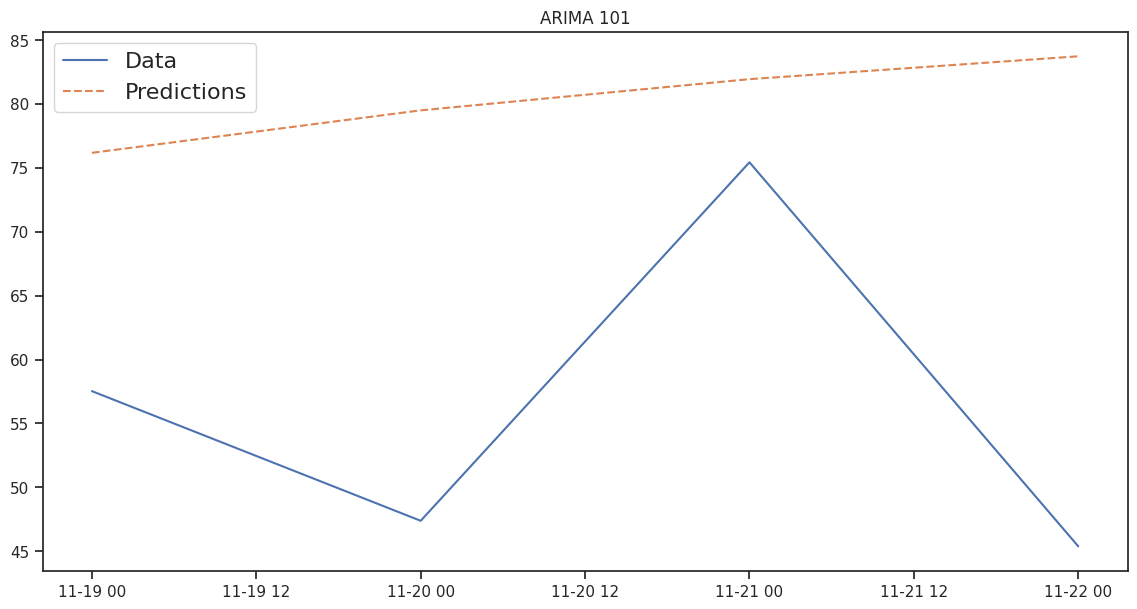

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(predictions, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

In [21]:
model_fit.aic 
model_fit.aicc

np.float64(10670.944064696032)

np.float64(10670.982269089538)

In [22]:
model_fit.bic

np.float64(10690.777858269223)

In [23]:
model_fit.params

const       88.664177
ar.L1        0.733858
ma.L1       -0.357208
sigma2    1476.907731
dtype: float64

In [24]:
model_fit.seasonalarparams
model_fit.seasonalmaparams

array([], dtype=float64)

array([], dtype=float64)

In [25]:
#rf to calculate aqi

In [26]:
manali_daily_aqi_rf = manali_daily_aqi_indexed.copy()

In [27]:
manali_daily_aqi_rf 

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NH3 (µg/m³),SO2 (µg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),O Xylene (µg/m³),...,CO (µg/m³),BP (hPa),PM2.5_SubIndex,PM10_SubIndex,CO_SubIndex,Ozone_SubIndex,SO2_SubIndex,NOx_SubIndex,Checks,AQI
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01,42.930000,88.200000,8.700417,6.303333,40.765000,7.922917,8.180000,1.993333,1.200000,0.305417,...,705.833333,1249.250471,77.777083,88.200000,35.291667,8.180000,9.903646,34.227750,6.000000,102.095833
2021-01-02,40.552083,88.200000,9.346667,6.436250,42.167917,7.330000,8.180000,1.854583,1.200000,0.341667,...,690.000000,1331.781233,67.586806,88.200000,34.500000,8.180000,9.162500,35.730771,5.958333,88.393056
2021-01-03,35.093750,88.200000,10.636250,4.377917,42.516250,7.442083,8.180000,1.870833,1.200000,0.297083,...,732.916667,1332.553390,58.489583,88.200000,36.645833,8.180000,9.302604,35.284271,6.000000,88.200000
2021-01-04,34.775833,88.200000,11.051250,3.906250,42.555417,8.755833,8.180000,2.131250,1.200000,0.382917,...,924.166667,1304.158582,57.959722,88.200000,46.208333,8.180000,10.944792,35.150125,6.000000,88.316667
2021-01-05,31.175000,88.200000,23.559583,4.763333,58.504583,8.491250,8.180000,7.160000,1.200000,0.594583,...,820.833333,1303.823055,53.950694,88.200000,41.041667,8.180000,10.614062,61.343626,6.000000,109.905244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-16,24.232500,15.267083,1.356667,2.563750,17.155417,4.245833,20.082917,0.691667,5.057917,0.150000,...,572.916667,1338.301235,41.454861,15.267083,28.645833,20.082917,5.307292,9.148354,5.958333,52.695278
2024-10-17,24.507917,44.318333,1.338750,2.493333,16.500417,4.207083,23.154583,2.297083,12.470000,0.150000,...,476.666667,1335.465920,42.981250,44.318333,22.989583,23.154583,5.258854,8.829146,5.541667,63.640069
2024-10-18,29.861250,44.644167,1.420833,2.747500,18.037083,9.205417,26.942500,1.639583,9.039167,0.150000,...,1435.000000,1342.240344,49.768750,44.644167,70.687500,26.942500,11.506771,9.798521,6.000000,72.847222


In [28]:
manali_daily_aqi_rf.columns

Index(['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
       'NH3 (µg/m³)', 'SO2 (µg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)',
       'Toluene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)',
       'MP-Xylene (µg/m³)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)',
       'VWS (m/s)', 'station', 'hour', 'day', 'month', 'year', 'Wind Impact',
       'NOx (µg/m³)', 'CO (µg/m³)', 'BP (hPa)', 'PM2.5_SubIndex',
       'PM10_SubIndex', 'CO_SubIndex', 'Ozone_SubIndex', 'SO2_SubIndex',
       'NOx_SubIndex', 'Checks', 'AQI'],
      dtype='object')

In [29]:
manali_daily_aqi_rf = manali_daily_aqi_rf[['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (µg/m³)', 'CO (µg/m³)', 'Ozone (µg/m³)', 'AQI']]
manali_daily_aqi_rf

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),CO (µg/m³),Ozone (µg/m³),AQI
Timestamp,,,,,,,,
2021-01-01,42.930000,88.200000,8.700417,6.303333,27.382200,705.833333,8.180000,102.095833
2021-01-02,40.552083,88.200000,9.346667,6.436250,28.584617,690.000000,8.180000,88.393056
2021-01-03,35.093750,88.200000,10.636250,4.377917,28.227417,732.916667,8.180000,88.200000
2021-01-04,34.775833,88.200000,11.051250,3.906250,28.120100,924.166667,8.180000,88.316667
2021-01-05,31.175000,88.200000,23.559583,4.763333,53.230633,820.833333,8.180000,109.905244
...,...,...,...,...,...,...,...,...
2024-10-16,24.232500,15.267083,1.356667,2.563750,7.318683,572.916667,20.082917,52.695278
2024-10-17,24.507917,44.318333,1.338750,2.493333,7.063317,476.666667,23.154583,63.640069
2024-10-18,29.861250,44.644167,1.420833,2.747500,7.838817,1435.000000,26.942500,72.847222


In [30]:
train_end = pd.Timestamp('2023-11-23')
test_end = pd.Timestamp('2023-12-01')

train_data = manali_daily_aqi_rf[:train_end]
test_data = manali_daily_aqi_rf[train_end + timedelta(days=1):test_end]

In [31]:

X_train_data = train_data.drop(['AQI'], axis=1)
y_train_data = train_data['AQI'].values

In [32]:
X_train_data

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),CO (µg/m³),Ozone (µg/m³)
Timestamp,,,,,,,
2021-01-01,42.930000,88.200000,8.700417,6.303333,27.382200,705.833333,8.180000
2021-01-02,40.552083,88.200000,9.346667,6.436250,28.584617,690.000000,8.180000
2021-01-03,35.093750,88.200000,10.636250,4.377917,28.227417,732.916667,8.180000
2021-01-04,34.775833,88.200000,11.051250,3.906250,28.120100,924.166667,8.180000
2021-01-05,31.175000,88.200000,23.559583,4.763333,53.230633,820.833333,8.180000
...,...,...,...,...,...,...,...
2023-11-19,18.133472,33.798194,5.200243,10.054479,28.673525,1097.604167,11.329375
2023-11-20,15.030000,24.971979,6.208437,10.455208,31.020522,732.118056,10.536389
2023-11-21,8.080069,17.187188,5.654965,10.140625,29.509864,1481.875000,9.709236


In [33]:

y_train_data

array([102.09583333,  88.39305556,  88.2       , ...,  75.43317708,
        45.38136458,  54.31489757])

In [34]:

test_data

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),CO (µg/m³),Ozone (µg/m³),AQI
Timestamp,,,,,,,,
2023-11-24,13.867326,22.323889,5.695382,10.003924,29.319449,1233.194444,8.916285,61.200852
2023-11-25,19.712951,34.298021,5.767188,10.215833,30.065965,1275.659722,11.972743,64.490064
2023-11-26,37.357153,51.199931,5.643750,9.659479,28.448839,1141.805556,17.171493,74.444097
2023-11-27,18.126840,28.357951,6.500069,10.337569,31.327915,1274.687500,11.214097,69.164910
2023-11-28,15.732986,25.398056,5.699479,9.951319,29.407378,1241.805556,12.058403,60.831174
2023-11-29,12.570625,15.812292,5.942674,10.143715,29.688790,1188.333333,8.916528,60.332306
2023-11-30,15.467361,24.663854,5.787361,10.256528,29.869153,1038.923611,8.332257,55.809747
2023-12-01,18.666181,28.801910,5.807500,9.719549,29.106251,687.638889,9.632847,48.863943


In [35]:

X_test_data = test_data.drop(['AQI'], axis=1)
y_test_data = test_data['AQI'].values

In [36]:

X_test_data

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),CO (µg/m³),Ozone (µg/m³)
Timestamp,,,,,,,
2023-11-24,13.867326,22.323889,5.695382,10.003924,29.319449,1233.194444,8.916285
2023-11-25,19.712951,34.298021,5.767188,10.215833,30.065965,1275.659722,11.972743
2023-11-26,37.357153,51.199931,5.643750,9.659479,28.448839,1141.805556,17.171493
2023-11-27,18.126840,28.357951,6.500069,10.337569,31.327915,1274.687500,11.214097
2023-11-28,15.732986,25.398056,5.699479,9.951319,29.407378,1241.805556,12.058403
2023-11-29,12.570625,15.812292,5.942674,10.143715,29.688790,1188.333333,8.916528
2023-11-30,15.467361,24.663854,5.787361,10.256528,29.869153,1038.923611,8.332257
2023-12-01,18.666181,28.801910,5.807500,9.719549,29.106251,687.638889,9.632847


In [37]:

y_test_data

array([61.20085243, 64.49006424, 74.44409722, 69.16490972, 60.83117361,
       60.33230556, 55.80974653, 48.86394329])

In [38]:

from sklearn.ensemble import RandomForestRegressor

In [39]:

rf = RandomForestRegressor()
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is use

In [40]:

rf.fit(X_train_data, y_train_data)

RandomForestRegressor()

In [41]:
pred = rf.predict(X_test_data)

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Random forest model')

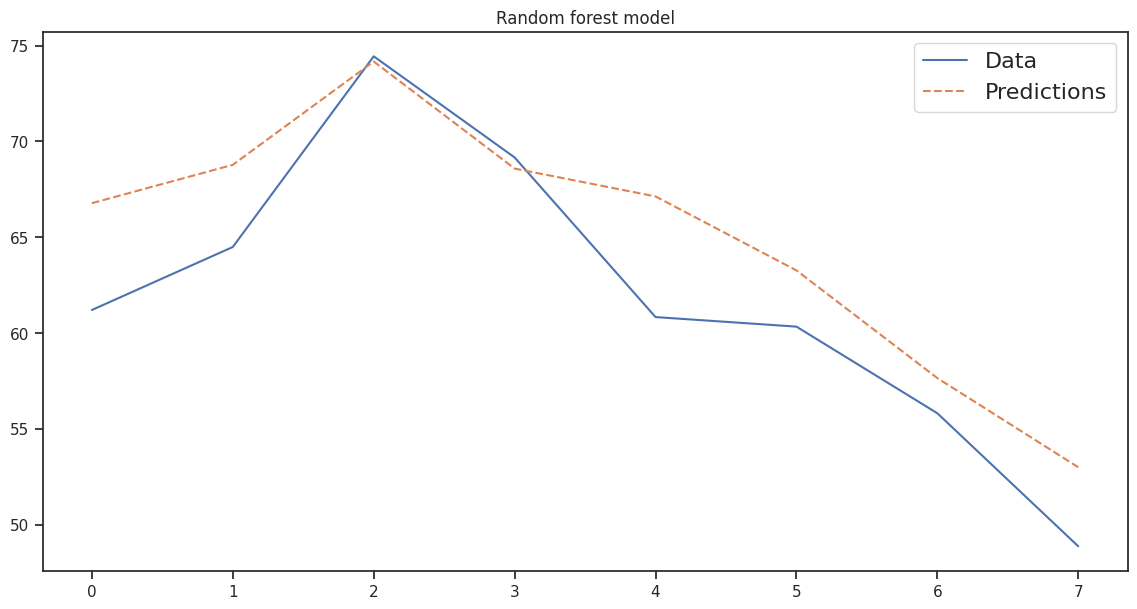

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_data)
plt.plot(pred, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("Random forest model")

In [43]:
#using Neural Network to calculate AQI